# Example Notebook 3: Generating Equilibrium Configurations
Here we provie a minimal working example of generating ion equilibrium configurations.

In order to run simulations with this code, the system must start in a pre-provided state. Usually this state is a position of stable equilibrium of the system. These positions of stable equilibrium depend on N and gamma and nothing else. A handful of pre-generated positions are already included with the code in the "input" folder, but this document explains how you can generate these yourself for arbitrary N and gamma.

In [9]:
import os
import numpy as np
from simulation_module import SimulationConfig, SimulationState, SimulationRunner, SimulationIO, SimulationVisualizer, AnimationMaker
from time import time

input_path = "input"
output_path = "output"

# Configure our simulation object with 8 ions, and gamma = 1. NOTE THAT MOST PARAMETERS IN THE CONFIG ARE NOT IMPORTANT HERE
config = SimulationConfig(
    N = 8,                        # number of ions
    w = 1.0,                      # frequency in the trap harmonic potential
    g = 1,                        # isotropy factor
    m = 137.327,                  # mass in atomic units
    T_mK = 0,                     # temperature in mK
    dt = 10**-3,                  # timestep
    num_steps = int(5*10**4),     # number of simulation steps
    damping = False,              # damping is turned off for now
    damping_parameter = 1.0,      # since damping is turned off, the strength of the damping parameter is not relevant
    langevin_temperature = False, # langevin_temperature is turned off for now (no random motion)
    lasers=[],                    # we have no lasers
    input_path = input_path,      # this is the input file we won't use
    output_path = output_path     # this is where we will put all outputs
)

state = SimulationState(config)

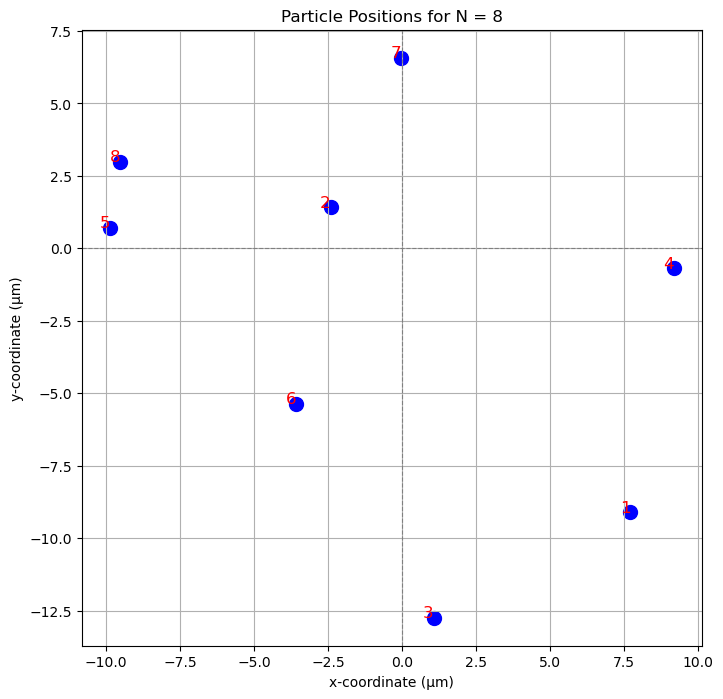

In [15]:
# Let's start by initializing the ions at random positions within a circle of predetermined radius given by utility.base_radius
state.initialize_positions(method = "random")
SimulationVisualizer().plot_positions(state, square = False)

🔍 Minimizing potential energy for N = 8 ions...
✅ Minimization complete. Final energy: 322411.2742 κ 
🔍 Solving for force balance (∑F = 0) for N = 8 ions...
✅ Force minimization complete. RMS force: 2.0023807763148687e-07 amu·μm·μs⁻²


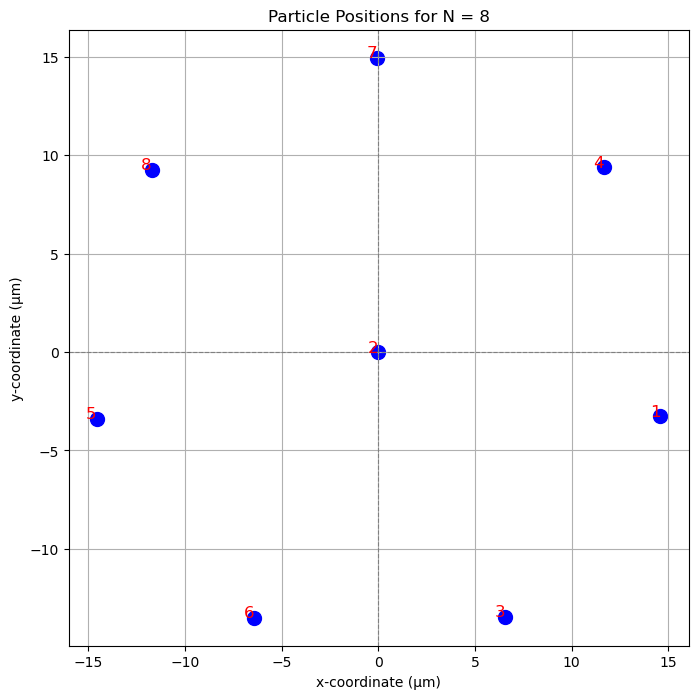

In [20]:
# Now we can use a little bit of trial and error to find stable configurations

# This tries to minimize the energy of the system, but it often struggles to find the best solution
state.minimize_energy()

# This tries to minimize the forces of the system, but it often finds positions of UNSTABLE equilibrium
state.minimize_forces()

# Visualize positions
SimulationVisualizer().plot_positions(state, square = False)

Try running the above two cells a few times and notice that sometimes you get different results. For 8 ions, there are two configurations that the system likes to spit out. The first (configuration A) has a ring of 6 ions encompassing two central ions and has an energy of roughly 324034.5071 κ and the second one (configuration B) has a ring of 7 ions encompassing a single central ion with an energy of roughly 322411.2742 κ. Directly comparing the energy shows that the configuration with a single ion in the centre is of a lower energy. It is however still possible that configuration A is stable, just a local minima of the energy as opposed to a global minimum. 